In [37]:
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


import numpy as np
from numpy.random import seed, randint

In [38]:
seed(504)
tf.random.set_seed(504)

# Getting the data

This digit is 0


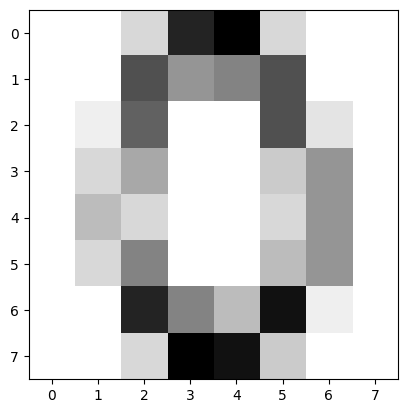

In [39]:
digits = load_digits()

a = randint(low = 0, high = len(digits.data) - 1)
plt.imshow(digits.images[a], cmap='Greys')
print("This digit is {}".format(digits.target[a]))

# Training the neural network

In [41]:
num_classes = 10
X = digits.data
y = digits.target
Y = tf.keras.utils.to_categorical(y, num_classes)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y)
input_size = X.shape[1]
X.shape

(1797, 64)

In [42]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 10)
tf.keras.callbacks.LearningRateScheduler()
model = tf.keras.models.Sequential([
    layers.Dense(units = 16, activation = 'tanh', input_dim = input_size, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(units = num_classes, activation = 'softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                1040      
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                170       
                                                                 
Total params: 1210 (4.73 KB)
Trainable params: 1210 (4.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005), metrics = ['accuracy'])

history = model.fit(X_train, Y_train, 
                    epochs = 100, 
                    validation_split = 0.2, 
                    callbacks = [callback])

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 2.2731 - accuracy: 0.2061 - val_loss: 1.8021 - val_accuracy: 0.4481
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.7148 - accuracy: 0.4355 - val_loss: 1.5150 - val_accuracy: 0.5519
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.4422 - accuracy: 0.5348 - val_loss: 1.2334 - val_accuracy: 0.6704
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1661 - accuracy: 0.6444 - val_loss: 0.9998 - val_accuracy: 0.7185
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9746 - accuracy: 0.7112 - val_loss: 0.7971 - val_accuracy: 0.8370
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7880 - accuracy: 0.7976 - val_loss: 0.6525 - val_accuracy: 0.8926
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.8273 - val_loss: 0.5653 - val_accuracy: 0.8963
Epoch 8/100
3

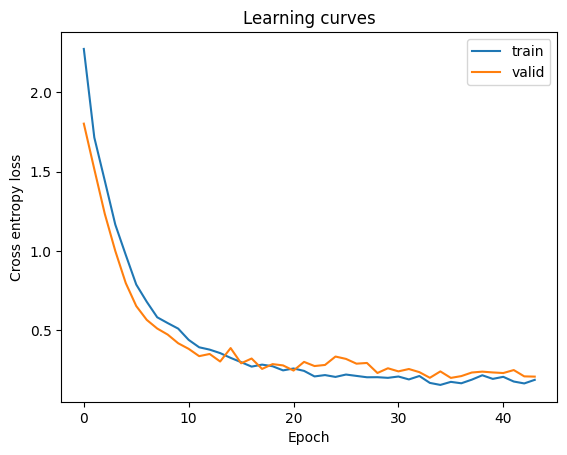

In [44]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

In [45]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, Y_train)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, Y_test)))

43/43 [==============================] - 0s 834us/step - loss: 0.1119 - accuracy: 0.9777
Loss + accuracy on train data: [0.11190802603960037, 0.9777283072471619]
15/15 [==============================] - 0s 855us/step - loss: 0.1776 - accuracy: 0.9444
Loss + accuracy on test data: [0.17756013572216034, 0.9444444179534912]


# Consider misclassified digits

In [46]:
probabilities = np.array(model.predict(X_test))
predictions = np.argmax(probabilities, axis = 1) #what does the model predict
labels = np.argmax(Y_test, axis = 1) #what are the actual labels

print("Predictions = {}".format(predictions[0:30]))
print("Labels      = {}".format(labels[0:30]))

15/15 [==============================] - 0s 784us/step
Predictions = [5 7 2 4 9 0 3 0 9 6 8 4 7 2 6 3 3 4 8 1 0 7 7 8 4 6 7 5 8 9]
Labels      = [5 7 2 4 9 0 3 0 9 6 8 4 7 2 6 3 3 5 8 1 0 7 7 8 6 1 7 5 8 9]


This digit is 1, but classified as 6.


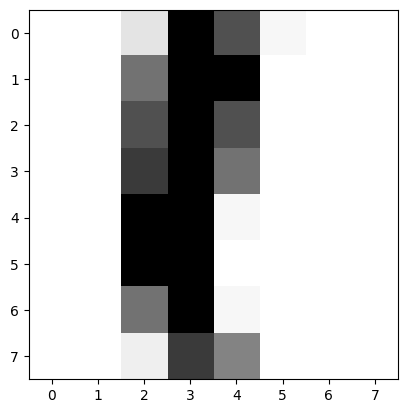

In [47]:
misclas_idxs = np.argwhere(predictions != labels)

b = randint(low = 0, high = len(misclas_idxs) - 1) #choose a random index
a = misclas_idxs[b][0] # find out what image that index is
plt.imshow(np.reshape(X_test[a], (8,8)), cmap='Greys')
print("This digit is {}, but classified as {}.".format(labels[a], predictions[a]))